Gradient Boosting
Gradient Boosting Regression originated from the question whether a weak learner can be modified to improve; a weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance. 
To minimize loss of the model, this regression adds weak learners using a gradient descent-like procedure. Gradient boosting involves three elements: a loss function to be optimized, a weak learner to make predictions, and an additive model to integrate weak learners to minimize the loss function. One new weak learner is added at a time, and existing weak learners are frozen and left unchanged. 
Our gradient boosting regression model resulted in a good R2 Score and MSE. This means we found a well-fitting model to predict the median price value for our price prediction model. 

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn import ensemble
data_abb = pd.read_csv('ABB_ML_ready.csv')
data_abb.head()

,Unnamed: 0,price,minimum_nights,availability_365,number_of_reviews,neighbourhood_group_Acton,neighbourhood_group_Adams-Normandie,neighbourhood_group_Agoura Hills,neighbourhood_group_Agua Dulce,neighbourhood_group_Alhambra,...,neighbourhood_group_Westwood,neighbourhood_group_Whittier,neighbourhood_group_Willowbrook,neighbourhood_group_Wilmington,neighbourhood_group_Windsor Square,neighbourhood_group_Winnetka,neighbourhood_group_Woodland Hills,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,3000,1,352,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,50,1,350,33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,55,1,348,14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,150,1,87,22,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,30,1,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
X = data_abb.iloc[:,:-1]
y = data_abb.iloc[:,-1]

In [11]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

In [12]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_training_set, y_training_set)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

R2 sq:  0.9999568287525893
Mean squared error: 0.00
Test Variance score: 1.00


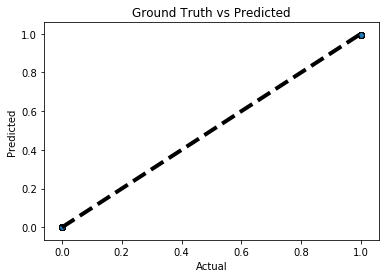

In [14]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [15]:
model.score(x_test_set, y_test_set)

0.9999568222182237

In [16]:
model.score(x_training_set,y_training_set)

0.9999568287525893